In [6]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, plot_roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import *

In [8]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [9]:
android = pd.read_csv("../../2_Only_Permissions_Datasets/Permission_AndroidMalwareNormal.csv")

# Separação dos dados

### Separação de conjuntos de treino, teste e validação

In [10]:
train, test = train_test_split(android,test_size = 0.2,stratify=android["class"],random_state=42)

In [11]:
X_TRAIN = train.drop("class", axis=1)
Y_TRAIN = train["class"]
x_train, x_validation, y_train, y_validation = train_test_split(X_TRAIN, Y_TRAIN, test_size = 0.375, stratify = Y_TRAIN, random_state=42)

In [12]:
# Balanceamento de dados de treino
rus = RandomUnderSampler()
x_train_balanced, y_train_balanced = rus.fit_resample(x_train, y_train)
x_train_balanced = pd.DataFrame(x_train_balanced)

In [13]:
x_test = test.drop("class", axis=1)
y_test = test["class"]

In [14]:
D_RandomForest = RandomForestClassifier()
B_RandomForest = RandomForestClassifier()

# HIPERPARÂMETROS PADRÕES

### Treino Desbalanceado

In [15]:
D_RandomForest.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
print("Treino desbalanceado")
print("Curva ROC >> ", (cross_val_score(D_RandomForest, x_validation, y_validation, scoring="roc_auc", cv = 5).mean())*100,"%")
print("Acurácia >> ", (cross_val_score(D_RandomForest, x_validation, y_validation, scoring="accuracy", cv = 5).mean())*100,"%")
print("Precisão >> ", (cross_val_score(D_RandomForest, x_validation, y_validation, scoring="precision", cv = 5).mean())*100,"%")
print("F1-Score >> ", (cross_val_score(D_RandomForest, x_validation, y_validation, scoring="f1", cv = 5).mean())*100,"%")
print("Recall >> ", (cross_val_score(D_RandomForest, x_validation, y_validation, scoring="recall", cv = 5).mean())*100,"%")

Treino desbalanceado
Curva ROC >>  56.900260055588745 %
Acurácia >>  68.83955008803999 %
Precisão >>  42.665694263753515 %
F1-Score >>  21.697830793781854 %
Recall >>  14.279249361146448 %


In [17]:
print("Treino desbalanceado")
print("Curva ROC >> ",roc_auc_score(y_validation,D_RandomForest.predict(x_validation))*100,"%")
print("Acurácia >> ", accuracy_score(y_validation,D_RandomForest.predict(x_validation))*100,"%")
print("Precisão >> ", precision_score(y_validation,D_RandomForest.predict(x_validation))*100,"%")
print("F1-Score >> ", f1_score(y_validation,D_RandomForest.predict(x_validation))*100,"%")
print("Recall >> ", recall_score(y_validation,D_RandomForest.predict(x_validation))*100,"%")

Treino desbalanceado
Curva ROC >>  52.06661629303064 %
Acurácia >>  68.05282382691767 %
Precisão >>  38.27683615819209 %
F1-Score >>  19.24715909090909 %
Recall >>  12.855787476280836 %


### Treino Balanceado

In [18]:
B_RandomForest.fit(x_train_balanced,y_train_balanced)

RandomForestClassifier()

In [19]:
print("Treino balanceado")
print("Curva ROC >> ", (cross_val_score(B_RandomForest, x_validation, y_validation, scoring="roc_auc", cv = 5).mean())*100,"%")
print("Acurácia >> ", (cross_val_score(B_RandomForest, x_validation, y_validation, scoring="accuracy", cv = 5).mean())*100,"%")
print("Precisão >> ", (cross_val_score(B_RandomForest, x_validation, y_validation, scoring="precision", cv = 5).mean())*100,"%")
print("F1-Score >> ", (cross_val_score(B_RandomForest, x_validation, y_validation, scoring="f1", cv = 5).mean())*100,"%")
print("Recall >> ", (cross_val_score(B_RandomForest, x_validation, y_validation, scoring="recall", cv = 5).mean())*100,"%")

Treino balanceado
Curva ROC >>  56.87145111786985 %
Acurácia >>  69.0925169960599 %
Precisão >>  42.44543729048252 %
F1-Score >>  21.00813568485314 %
Recall >>  14.516441332417735 %


In [20]:
print("Treino balanceado")
print("Curva ROC >> ",roc_auc_score(y_validation,B_RandomForest.predict(x_validation))*100,"%")
print("Acurácia >> ", accuracy_score(y_validation,B_RandomForest.predict(x_validation))*100,"%")
print("Precisão >> ", precision_score(y_validation,B_RandomForest.predict(x_validation))*100,"%")
print("F1-Score >> ", f1_score(y_validation,B_RandomForest.predict(x_validation))*100,"%")
print("Recall >> ", recall_score(y_validation,B_RandomForest.predict(x_validation))*100,"%")

Treino balanceado
Curva ROC >>  54.453720642207045 %
Acurácia >>  54.664231525709475 %
Precisão >>  33.51016799292662 %
F1-Score >>  41.337938556626064 %
Recall >>  53.93738140417458 %


# TESTANDO HIPERPARÂMETROS

In [21]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

D_RS = RandomizedSearchCV(D_RandomForest, random_grid, random_state=42, scoring="roc_auc",cv = 5, n_iter=100, n_jobs=-1, verbose=2).fit(x_train,y_train)
B_RS = RandomizedSearchCV(B_RandomForest, random_grid, random_state=42, scoring="roc_auc",cv = 5, n_iter = 100, n_jobs=-1, verbose=2).fit(x_train_balanced,y_train_balanced)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  17.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  17.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  17.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  18.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  18.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  48.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; to

In [22]:
D_RS.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [23]:
B_RS.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

# HIPERPARÂMETROS OTIMIZADOS

In [24]:
OD_RandomForest = RandomForestClassifier(**D_RS.best_params_)
OB_RandomForest = RandomForestClassifier(**B_RS.best_params_)

In [25]:
OD_RandomForest.fit(x_train,y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=600)

In [26]:
print("Treino desbalanceado")
print("Curva ROC >> ", (cross_val_score(OD_RandomForest, x_validation, y_validation, scoring="roc_auc", cv = 5).mean())*100,"%")
print("Acurácia >> ", (cross_val_score(OD_RandomForest, x_validation, y_validation, scoring="accuracy", cv = 5).mean())*100,"%")
print("Precisão >> ", (cross_val_score(OD_RandomForest, x_validation, y_validation, scoring="precision", cv = 5).mean())*100,"%")
print("F1-Score >> ", (cross_val_score(OD_RandomForest, x_validation, y_validation, scoring="f1", cv = 5).mean())*100,"%")
print("Recall >> ", (cross_val_score(OD_RandomForest, x_validation, y_validation, scoring="recall", cv = 5).mean())*100,"%")

Treino desbalanceado
Curva ROC >>  58.35966745573593 %
Acurácia >>  70.84851003182074 %
Precisão >>  67.48883374689825 %
F1-Score >>  7.330079352736448 %
Recall >>  3.8898582701984665 %


In [27]:
print("Treino desbalanceado")
print("Curva ROC >> ",roc_auc_score(y_validation,OD_RandomForest.predict(x_validation))*100,"%")
print("Acurácia >> ", accuracy_score(y_validation,OD_RandomForest.predict(x_validation))*100,"%")
print("Precisão >> ", precision_score(y_validation,OD_RandomForest.predict(x_validation))*100,"%")
print("F1-Score >> ", f1_score(y_validation,OD_RandomForest.predict(x_validation))*100,"%")
print("Recall >> ", recall_score(y_validation,OD_RandomForest.predict(x_validation))*100,"%")

Treino desbalanceado
Curva ROC >>  51.761704295394026 %
Acurácia >>  71.14357965720708 %
Precisão >>  71.7741935483871 %
F1-Score >>  7.974910394265233 %
Recall >>  4.222011385199241 %


In [28]:
OB_RandomForest.fit(x_train_balanced, y_train_balanced)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1600)

In [29]:
print("Treino balanceado")
print("Curva ROC >> ", (cross_val_score(OB_RandomForest, x_validation, y_validation, scoring="roc_auc", cv = 5).mean())*100,"%")
print("Acurácia >> ", (cross_val_score(OB_RandomForest, x_validation, y_validation, scoring="accuracy", cv = 5).mean())*100,"%")
print("Precisão >> ", (cross_val_score(OB_RandomForest, x_validation, y_validation, scoring="precision", cv = 5).mean())*100,"%")
print("F1-Score >> ", (cross_val_score(OB_RandomForest, x_validation, y_validation, scoring="f1", cv = 5).mean())*100,"%")
print("Recall >> ", (cross_val_score(OB_RandomForest, x_validation, y_validation, scoring="recall", cv = 5).mean())*100,"%")

Treino balanceado
Curva ROC >>  58.174725792417824 %
Acurácia >>  70.89064486328141 %
Precisão >>  65.43361823361823 %
F1-Score >>  7.25118032306469 %
Recall >>  3.794846393713906 %


In [30]:
print("Curva ROC >> ",roc_auc_score(y_validation,OB_RandomForest.predict(x_validation))*100,"%")
print("Acurácia >> ", accuracy_score(y_validation,OB_RandomForest.predict(x_validation))*100,"%")
print("Precisão >> ", precision_score(y_validation,OB_RandomForest.predict(x_validation))*100,"%")
print("F1-Score >> ", f1_score(y_validation,OB_RandomForest.predict(x_validation))*100,"%")
print("Recall >> ", recall_score(y_validation,OB_RandomForest.predict(x_validation))*100,"%")

Curva ROC >>  55.279838804364715 %
Acurácia >>  56.96824950828885 %
Precisão >>  34.651237544198004 %
F1-Score >>  41.31059589959762 %
Recall >>  51.13851992409867 %


# HIPERPARÂMETROS PADRÕES X HIPERPARÂMETROS OTIMIZADOS

### Desbalanceado

/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use o

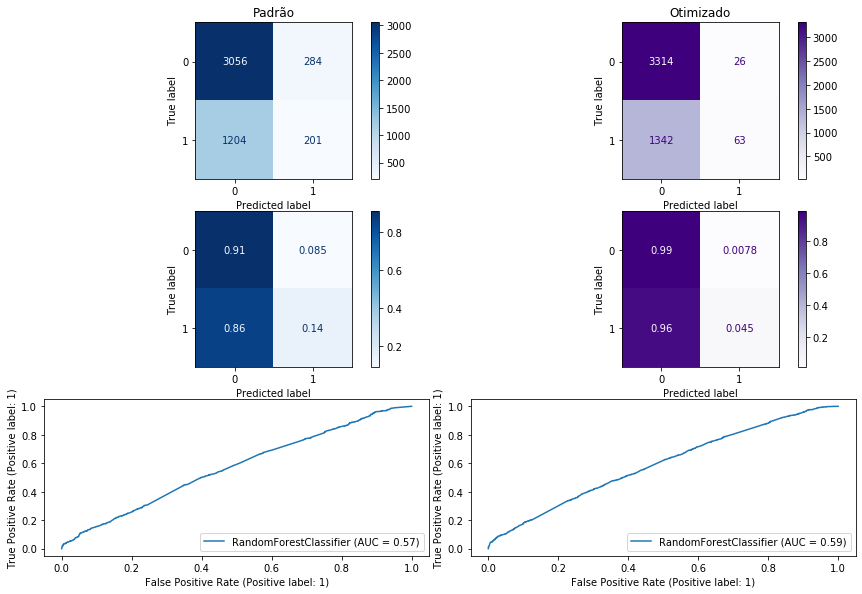

In [31]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,8))
plt.tight_layout()
ax1.set(title="Padrão")
ax2.set(title="Otimizado")
plot_confusion_matrix(D_RandomForest, x_test, y_test,ax=ax1, cmap = "Blues", values_format="d")
plot_confusion_matrix(OD_RandomForest, x_test, y_test, ax=ax2, cmap= "Purples", values_format="d")
plot_confusion_matrix(D_RandomForest, x_test, y_test,ax=ax3, cmap = "Blues", normalize = "true")
plot_confusion_matrix(OD_RandomForest, x_test, y_test, ax=ax4, cmap= "Purples", normalize = "true")
plot_roc_curve(D_RandomForest,x_test, y_test, ax=ax5)
plot_roc_curve(OD_RandomForest,x_test, y_test, ax=ax6)

In [32]:
print("PADRÃO - ROC_AUC>>",roc_auc_score(y_test, D_RandomForest.predict(x_test))*100, "%")

PADRÃO - ROC_AUC>> 52.901527905044 %


In [33]:
print("OTIMIZADO - ROC_AUC>>",roc_auc_score(y_test, OD_RandomForest.predict(x_test))*100, "%")

OTIMIZADO - ROC_AUC>> 51.85277132567605 %


### Balanceado

/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use o

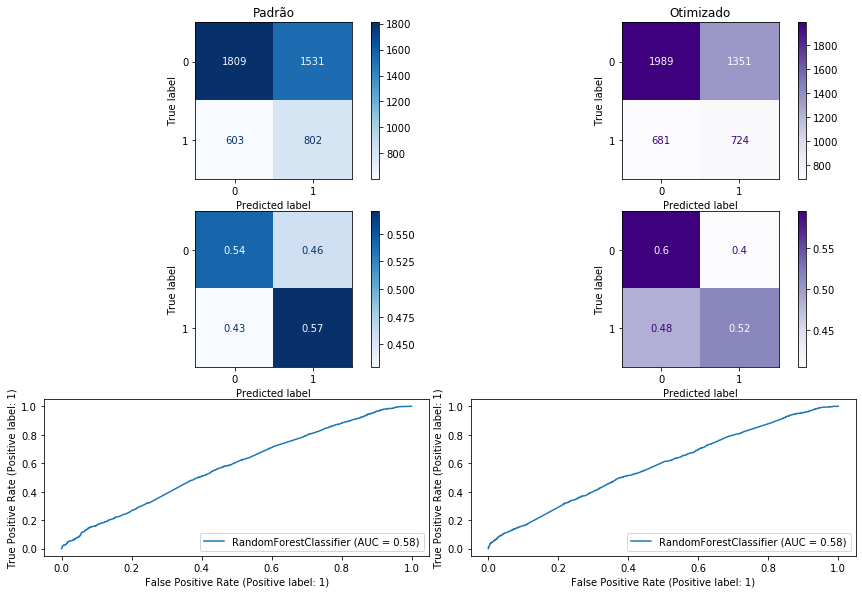

In [34]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,8))
plt.tight_layout()
ax1.set(title="Padrão")
ax2.set(title="Otimizado")
plot_confusion_matrix(B_RandomForest, x_test, y_test,ax=ax1, cmap = "Blues", values_format="d")
plot_confusion_matrix(OB_RandomForest, x_test, y_test, ax=ax2, cmap= "Purples", values_format="d")
plot_confusion_matrix(B_RandomForest, x_test, y_test,ax=ax3, cmap = "Blues", normalize = "true")
plot_confusion_matrix(OB_RandomForest, x_test, y_test, ax=ax4, cmap= "Purples", normalize = "true")
plot_roc_curve(B_RandomForest,x_test, y_test, ax=ax5)
plot_roc_curve(OB_RandomForest,x_test, y_test, ax=ax6)

In [35]:
print("PADRÃO - ROC_AUC >>",roc_auc_score(y_test, B_RandomForest.predict(x_test))*100, "%")

PADRÃO - ROC_AUC >> 55.62176359025721 %


In [36]:
print("OTIMIZADO - ROC_AUC >>",roc_auc_score(y_test, OB_RandomForest.predict(x_test))*100, "%")

OTIMIZADO - ROC_AUC >> 55.540573656956546 %


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2d8ac86b-a893-46e4-9843-c480ae878176' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>